In [1]:
import os
import sys
import time
from datetime import datetime
import cv2
import gc

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from utils import common, models, losses, logger
from utils.dataset import EmbeddingDataset, EmbeddingMatrix

2025-04-01 13:55:26.059788: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 13:55:26.059856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 13:55:26.060971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 13:55:26.067295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-01 13:55:27.388382: W tensorflow/compiler/tf2

In [3]:
HARD_SELECT = 20
BATCH_SIZE = 8
INPUT_SHAPE = (224, 224, 3)

# preprocessor
image_preprocess = common.EmbeddingPreprocessor()
augmentation = common.EmbeddingAugmentation()

train_start = time.time()

# initalize hyper-parameters
model = models.EmbeddingModel(INPUT_SHAPE)
model.load("embedding/weights/last.h5")
optimizer = Adam(learning_rate=1e-5)

# data preparation
train_dataset = EmbeddingDataset("datasets/train.csv")
# valid_dataset = EmbeddingDataset("datasets/valid.csv")
train_matrix = EmbeddingMatrix(model, train_dataset)
gc.collect()

1851

In [4]:
train_matrix.update_matrix(8)

2025-04-01 13:56:24.664878: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [9]:
embedding_vectors = train_matrix.matrix.numpy()

In [11]:
tsne = TSNE(n_components=2, perplexity=30)
embedding_2d = tsne.fit_transform(embedding_vectors)

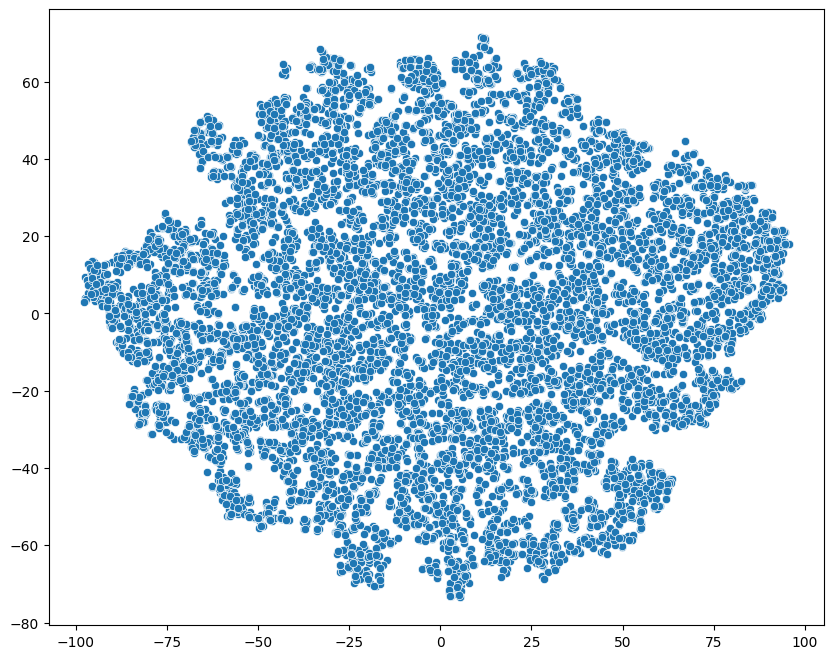

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embedding_2d[:, 0], y=embedding_2d[:, 1])
plt.show()